In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training metrics from CSV (generated by train.py)
train_metrics_path = "retrieval_model/training_metrics.csv"
train_df = pd.read_csv(train_metrics_path)
print("Training Metrics:")
print(train_df.head())

Training Metrics:
Empty DataFrame
Columns: [epoch, train_loss, train_accuracy]
Index: []


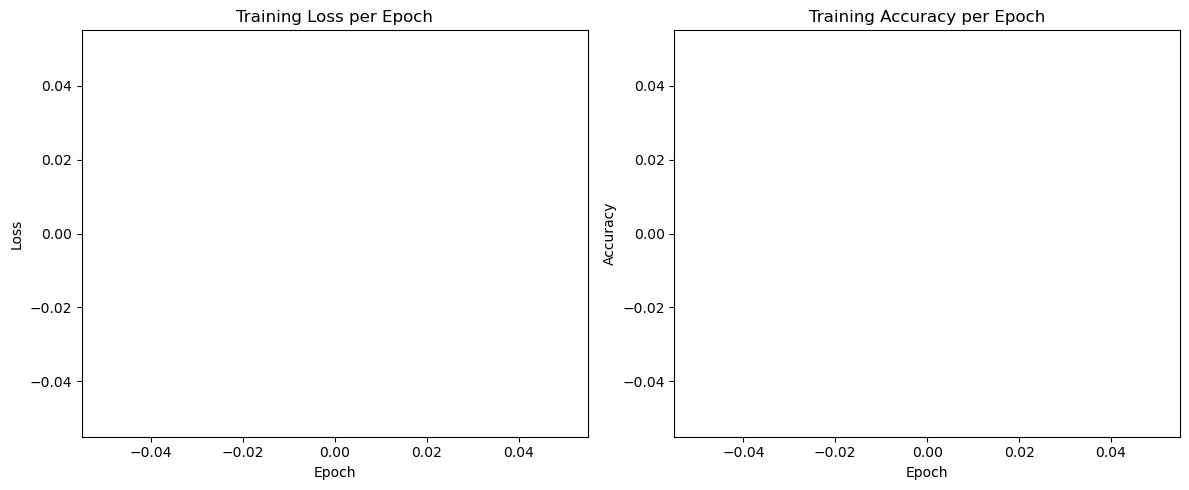

In [4]:
# Create a figure with two subplots: one for loss, one for accuracy
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Training Loss
axs[0].plot(train_df['epoch'], train_df['train_loss'], marker='o', color='blue')
axs[0].set_title("Training Loss per Epoch")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")

# Plot Training Accuracy
axs[1].plot(train_df['epoch'], train_df['train_accuracy'], marker='o', color='orange')
axs[1].set_title("Training Accuracy per Epoch")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()


In [3]:
# Load evaluation metrics from CSV files generated by eval.py
baseline_metrics_path = "evaluation_results/baseline_metrics.csv"
moe_metrics_path = "evaluation_results/moe_metrics.csv"

baseline_df = pd.read_csv(baseline_metrics_path)
moe_df = pd.read_csv(moe_metrics_path)

print("Baseline Evaluation Metrics:")
print(baseline_df)
print("\nTinyBERT+MoE Evaluation Metrics:")
print(moe_df)


Baseline Evaluation Metrics:
              Model  Recall@10  NDCG@10     MRR
0  BaselineTinyBERT     0.0012   0.0004  0.0001

TinyBERT+MoE Evaluation Metrics:
          Model  Recall@10  NDCG@10     MRR
0  TinyBERT_MoE        1.0    0.961  0.9494


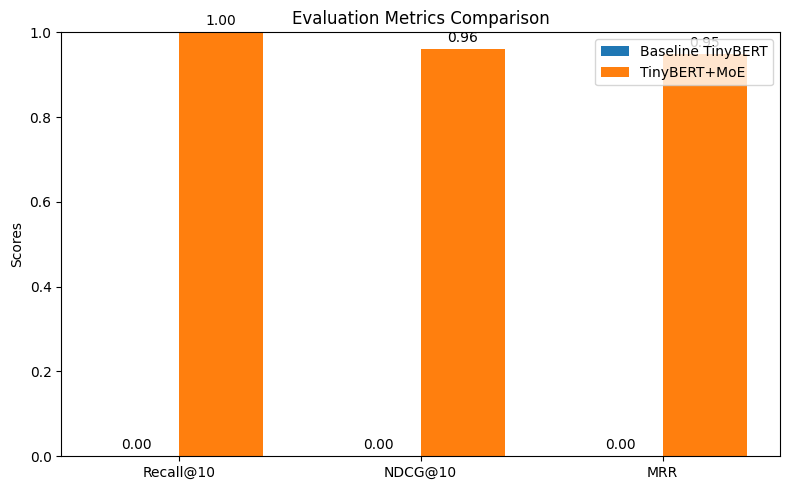

In [5]:
import numpy as np

# Assume CSVs have columns: Model, Recall@10, NDCG@10, MRR
metrics = ["Recall@10", "NDCG@10", "MRR"]

# Extract values from the dataframes (skip the first column which is the model name)
baseline_values = baseline_df.iloc[0, 1:].values.astype(float)
moe_values = moe_df.iloc[0, 1:].values.astype(float)

# Create a grouped bar chart
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, baseline_values, width, label='Baseline TinyBERT')
rects2 = ax.bar(x + width/2, moe_values, width, label='TinyBERT+MoE')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Label the bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
                    
autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()


CSV saved to visualization/training_metrics.csv


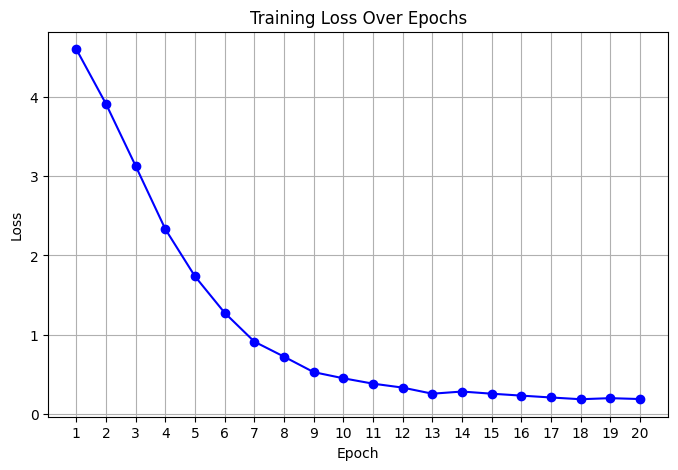

Plot saved to visualization/training_loss.png


In [7]:
import os
import csv
import matplotlib.pyplot as plt

# Define the training log data manually
training_data = [
    {'epoch': 1.0,  'loss': 4.5996, 'grad_norm': 7.6050705909729,  'learning_rate': 4.766666666666667e-05},
    {'epoch': 2.0,  'loss': 3.9098, 'grad_norm': 14.37641716003418,  'learning_rate': 4.5333333333333335e-05},
    {'epoch': 3.0,  'loss': 3.1274, 'grad_norm': 24.89023780822754,  'learning_rate': 4.2833333333333335e-05},
    {'epoch': 4.0,  'loss': 2.3312, 'grad_norm': 20.054271697998047, 'learning_rate': 4.0333333333333336e-05},
    {'epoch': 5.0,  'loss': 1.7353, 'grad_norm': 17.120088577270508, 'learning_rate': 3.7833333333333336e-05},
    {'epoch': 6.0,  'loss': 1.2762, 'grad_norm': 15.643247604370117, 'learning_rate': 3.5333333333333336e-05},
    {'epoch': 7.0,  'loss': 0.9127, 'grad_norm': 10.328717231750488, 'learning_rate': 3.283333333333333e-05},
    {'epoch': 8.0,  'loss': 0.7234, 'grad_norm': 15.651459693908691, 'learning_rate': 3.0333333333333337e-05},
    {'epoch': 9.0,  'loss': 0.5282, 'grad_norm': 13.165779113769531, 'learning_rate': 2.7833333333333333e-05},
    {'epoch': 10.0, 'loss': 0.4507, 'grad_norm': 11.972829818725586, 'learning_rate': 2.5333333333333337e-05},
    {'epoch': 11.0, 'loss': 0.3828, 'grad_norm': 16.678470611572266, 'learning_rate': 2.2833333333333334e-05},
    {'epoch': 12.0, 'loss': 0.3331, 'grad_norm': 5.218963623046875, 'learning_rate': 2.0333333333333334e-05},
    {'epoch': 13.0, 'loss': 0.2562, 'grad_norm': 0.5626490116119385, 'learning_rate': 1.7833333333333334e-05},
    {'epoch': 14.0, 'loss': 0.2835, 'grad_norm': 10.92097282409668,  'learning_rate': 1.5333333333333334e-05},
    {'epoch': 15.0, 'loss': 0.2563, 'grad_norm': 13.844746589660645, 'learning_rate': 1.2833333333333333e-05},
    {'epoch': 16.0, 'loss': 0.2321, 'grad_norm': 5.364108562469482, 'learning_rate': 1.0333333333333333e-05},
    {'epoch': 17.0, 'loss': 0.2085, 'grad_norm': 4.911080360412598, 'learning_rate': 7.833333333333333e-06},
    {'epoch': 18.0, 'loss': 0.1866, 'grad_norm': 0.8569371700286865, 'learning_rate': 5.333333333333334e-06},
    {'epoch': 19.0, 'loss': 0.2,    'grad_norm': 4.328950881958008, 'learning_rate': 2.8333333333333335e-06},
    {'epoch': 20.0, 'loss': 0.1889, 'grad_norm': 8.586971282958984, 'learning_rate': 3.3333333333333335e-07},
]

# Create 'visualization' directory if it doesn't exist
os.makedirs("visualization", exist_ok=True)

# Write the data to a CSV file
csv_filename = os.path.join("visualization", "training_metrics.csv")
with open(csv_filename, mode="w", newline="") as csv_file:
    fieldnames = ["epoch", "loss", "grad_norm", "learning_rate"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for record in training_data:
        writer.writerow(record)

print(f"CSV saved to {csv_filename}")

# Extract data for plotting
epochs = [int(record['epoch']) for record in training_data]
losses = [record['loss'] for record in training_data]

# Create a loss vs. epoch plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.grid(True)

# Save the plot to the visualization folder
plot_filename = os.path.join("visualization", "training_loss.png")
plt.savefig(plot_filename)
plt.show()

print(f"Plot saved to {plot_filename}")
